# PREDICTING AVOCADO PRICES USING FACEBOOK PROPHET

## PROBLEM STATEMENT

Data represents weekly 2018 retail scan data for National retail volume (units) and price.

Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/avocado-prices/avocado.csv


In [2]:
!pip install fbprophet

## STEP #1: IMPORTING DATA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet
%matplotlib inline

In [4]:
df = pd.read_csv("/kaggle/input/avocado-prices/avocado.csv")

In [5]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## STEP #2: EXPLORING THE DATASET

In [16]:
#Let's check for missing data

df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [17]:
#drop the unnamed column since it does not contribute to our analysis

df = df.drop('Unnamed: 0',axis=1)

In [19]:
#chekcing the data types

df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [20]:
#convert the data column from object datatype to datetype

df['Date'] = pd.to_datetime(df['Date'])

In [21]:
df = df.sort_values("Date")

In [24]:
#checking the initial and last dates

df['Date'].head()

11569   2015-01-04
9593    2015-01-04
10009   2015-01-04
1819    2015-01-04
9333    2015-01-04
Name: Date, dtype: datetime64[ns]

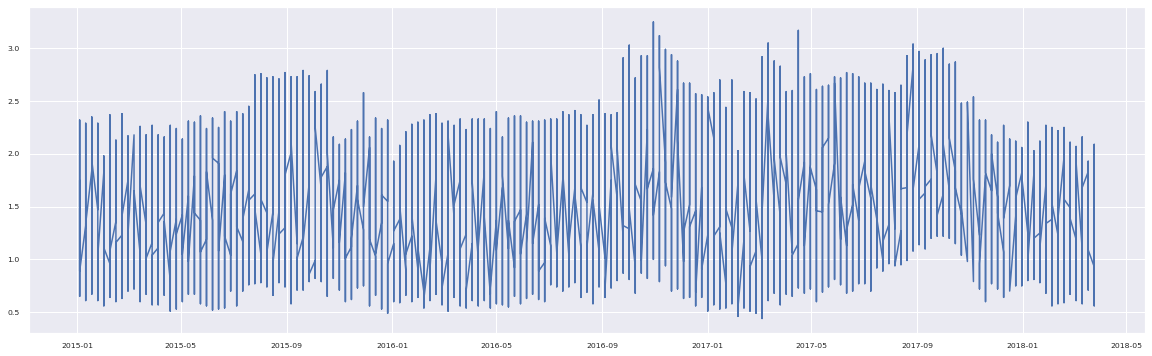

In [25]:
plt.figure(figsize=(20,6))

plt.plot(df['Date'], df['AveragePrice']);

In [26]:
import pylab as pl
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

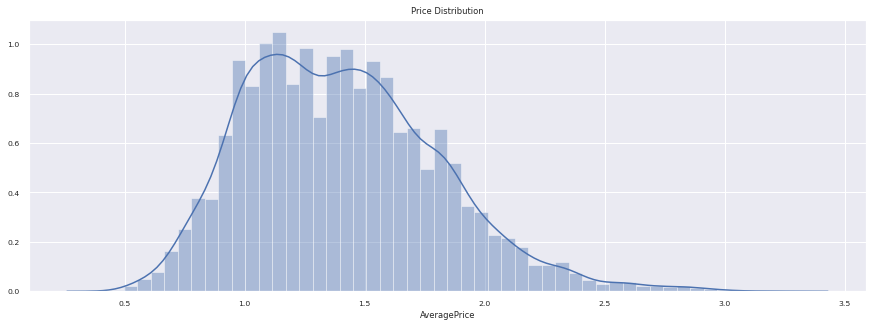

In [27]:
#plot Distribution of the average price

pl.figure(figsize=(15,5))
pl.title("Price Distribution")
ax = sns.distplot(df["AveragePrice"], color = 'b')

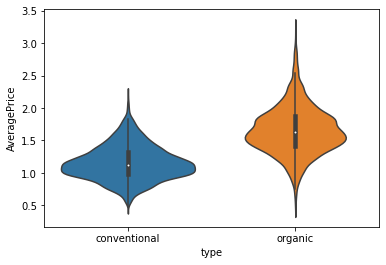

In [14]:
#plot violin plot of the average price vs. avocado type
sns.violinplot(y = 'AveragePrice', x = 'type', data = df);

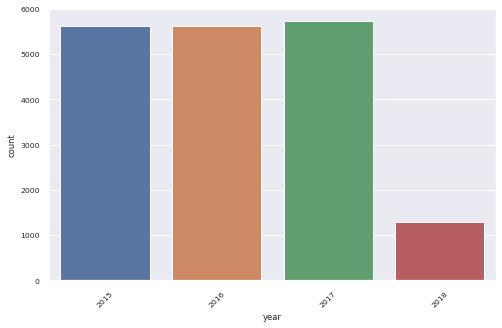

In [30]:
# Bar Chart to indicate the year
plt.figure(figsize=[8,5])
sns.countplot(x = 'year', data = df)
plt.xticks(rotation = 45);

In [31]:
avocado_prophet_df = df[['Date', 'AveragePrice']]

In [32]:
avocado_prophet_df.shape

(18249, 2)

In [33]:
avocado_prophet_df.head()

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


## STEP 3: MAKE PREDICTIONS

In [34]:
avocado_prophet_df = avocado_prophet_df.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [35]:
avocado_prophet_df.shape

(18249, 2)

In [36]:
avocado_prophet_df.head()

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


- Prophet is open source software released by Facebook’s Core Data Science team.

- Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.

- Prophet works best with time series that have strong seasonal effects and several seasons of historical data.

- For more information, 

Please check this out for more: https://research.fb.com/prophet-forecasting-at-scale/ 

https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [37]:
m = Prophet()
m.fit(avocado_prophet_df)

In [38]:
# Forcasting into the future
future_complete = m.make_future_dataframe(periods=365)
forecast_complete = m.predict(future_complete)

In [39]:
forecast_complete[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-04,1.385214,0.896880,1.844977
1,2015-01-11,1.388445,0.896683,1.852128
2,2015-01-18,1.383592,0.897846,1.877244
3,2015-01-25,1.359485,0.862944,1.858269
4,2015-02-01,1.325978,0.839926,1.804323


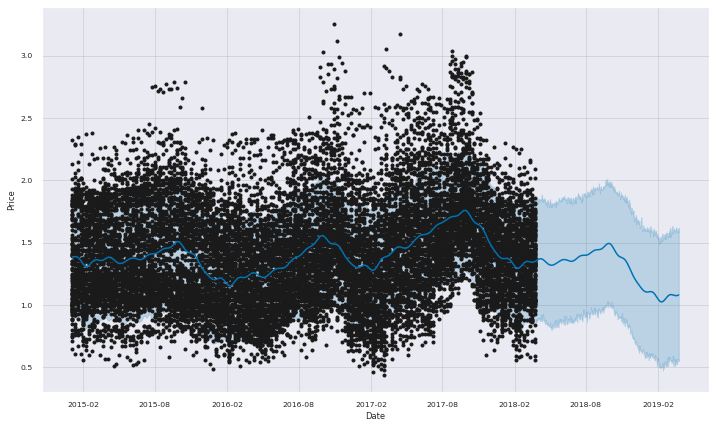

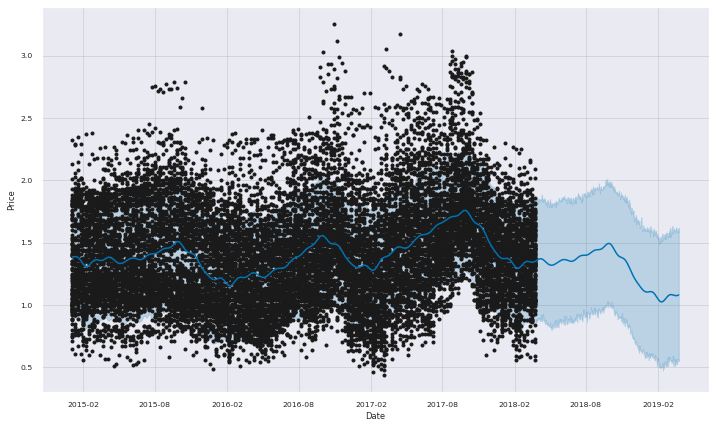

In [40]:
m.plot(forecast_complete, xlabel='Date', ylabel='Price')

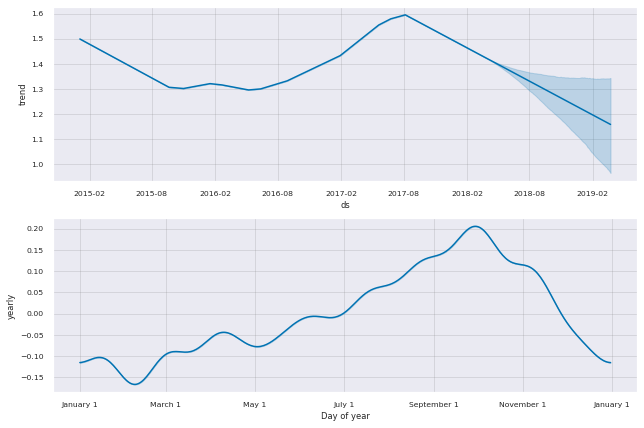

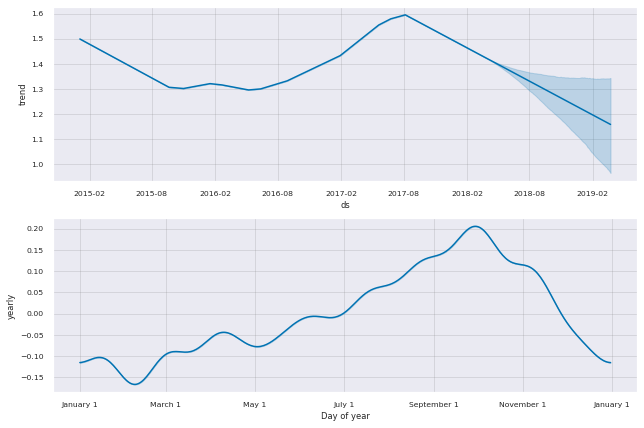

In [43]:
m.plot_components(forecast_complete)


This Project done as a part of Guided Project "Predict Future Product Prices Using Facebook Prophet" on Coursera.